<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Hands%20on%20Unsupervised%20Oreilly/Credit_card_unsupervised_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
import itertools

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Dimension reduction

In [ ]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20, \
                    random_state=2018, stratify=dataY)

In [ ]:
print(X_train.shape)
X_train.head()

(227845, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212834,0.930700,-0.193563,-0.136547,-0.044610,-1.471851,0.299420,-0.447038,0.065017,-0.903609,-0.798323,0.777325,0.567004,-1.292424,-1.835557,0.267809,-0.676375,1.297130,-0.277600,-0.458910,0.618104,-0.431244,1.781078,1.908755,-0.224010,1.282179,-1.551742,-0.388800,0.018078,0.019746,-0.189908
175643,0.581475,1.145707,-0.464983,-1.365275,-0.886248,0.305657,0.066829,-0.273461,-0.153975,-0.720206,0.881148,0.098351,0.322958,1.307987,-0.171925,-1.092521,1.037590,-0.323926,-0.816001,1.463272,0.145879,0.755524,2.356802,-0.473290,-0.455927,1.229323,0.632015,-0.113455,-0.257673,-0.253277
32164,-1.224452,-0.132705,0.713528,0.633126,0.630864,0.100135,0.231616,0.130995,-1.418178,-0.417453,0.428285,1.664365,1.082977,0.337247,0.279745,0.476292,-0.411223,-0.270911,-0.000925,0.079491,-0.446114,2.304290,0.332887,0.582661,0.332978,-2.285405,-1.196946,0.395602,-0.122872,-0.273268
79783,-0.771538,0.677347,-0.593270,0.134047,-0.819728,-0.374058,0.793413,-0.989350,0.295608,-0.421328,0.672262,-0.039082,-0.728508,-0.042104,-0.215013,0.938789,2.189987,-0.602120,-0.197767,0.977359,0.230517,0.499247,1.235857,-0.528168,-2.753810,0.998054,0.138978,0.089492,0.003362,-0.133535
107026,-0.517390,-0.161335,0.702321,0.761409,-0.019016,0.180568,-0.574303,0.599706,-0.067450,-0.410422,-0.483954,-0.433314,0.084132,0.714155,-0.580312,0.941704,0.527760,-0.179441,-0.103065,0.049886,0.207703,-0.382678,-0.981056,-0.103749,-0.019104,-0.181466,0.191556,0.615710,0.290262,-0.338876


In [ ]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [ ]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

## PCA

In [ ]:
from sklearn.decomposition import PCA
whiten = False
random_state = 2018

pca = PCA(0.95, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
212834,-0.328386,-1.647120,-0.370647,1.069640,-0.448299,0.033146,0.104970,-0.257753,-0.144465,0.138775,-0.183408,-0.699255,2.408763,-0.276889,-0.647064,1.839798,-0.454629,1.126125,1.077458,-0.547043,-0.120453,-0.698270,-1.131134,1.133642,-2.028178,0.259533,0.249779
175643,-0.391033,-1.499358,-0.174836,-0.021138,-0.126573,-0.259141,0.018763,-0.119671,0.495395,-0.388307,-0.624634,-0.320947,-0.371824,-0.592912,-1.886222,-0.120720,-2.147871,0.932113,1.861459,1.074669,1.646203,0.353684,-0.098525,0.626862,-0.000636,-0.441325,-0.427625
32164,-0.251329,0.768326,-0.715681,2.481347,-0.233165,-0.264697,-0.017123,0.073743,0.015488,0.233733,0.703183,-0.071201,0.343467,0.700585,-0.097981,0.033051,0.043164,-0.303798,-0.778685,-0.165679,-1.181274,0.036525,-1.240614,3.033557,-0.278349,-0.317095,0.429228
79783,-0.178978,0.806585,-0.015431,0.030605,-0.016860,-0.165207,0.066215,0.066120,0.317023,0.646959,-0.904334,-0.225339,-0.547126,-0.461122,-2.377110,-0.249525,0.098223,-0.746629,1.380486,1.547023,2.169981,-1.131580,-0.573755,-0.439980,-1.603572,-0.701797,0.178609
107026,-0.422434,0.802797,0.092058,-0.132500,-0.083164,-0.063562,0.446350,0.376678,-0.042132,0.917738,0.002988,0.965396,-0.602810,0.467631,0.865096,-0.527295,0.193088,-0.278194,0.393471,-1.101177,0.360459,-0.519215,-0.087464,0.102168,0.138395,-0.142742,0.069431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48687,2.790033,0.951285,-0.008367,0.087185,-0.694909,0.506011,-0.289624,-0.168223,-0.008594,1.003334,0.630052,1.042305,-0.758453,-0.840284,0.844799,-0.917007,-0.214642,-0.268632,0.636924,-0.212475,0.862443,-0.164387,0.910430,-1.334788,-0.886176,-0.937503,0.616739
159608,-0.435838,-1.079428,0.057791,-0.084610,-0.140470,-0.219667,0.503158,0.309035,0.038082,1.216414,0.218779,0.290398,-0.000130,0.344989,0.028067,-1.451734,0.050735,-1.224011,0.576376,-0.877380,0.279461,-1.028943,1.163840,-1.006927,-0.226073,0.215674,0.323378
205176,8.201056,-1.394710,-0.372240,0.314482,-1.878672,1.714176,-0.723460,-1.789461,-1.012728,-0.128946,1.899642,0.385919,1.082216,-1.189724,1.105657,-0.545348,0.309816,-0.755390,0.497387,-0.994486,2.089284,-0.887795,-1.161978,-0.259862,-0.644684,0.879939,-1.040974
197673,-0.603686,-2.393943,0.522242,-0.515993,-0.521553,0.217642,0.899988,-0.766855,-0.021740,-1.683623,-0.617853,-3.180667,-1.347854,0.044459,0.318835,0.894758,0.864102,0.339722,0.022207,-2.080588,-2.503211,-0.536475,0.734151,-0.362354,0.254577,-1.083796,0.880067


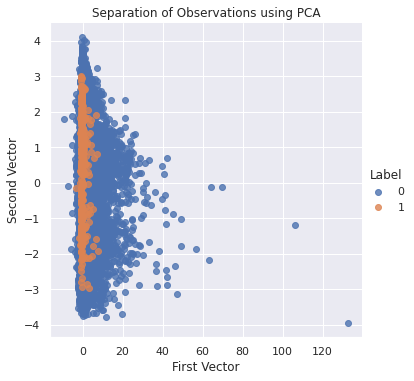

In [ ]:
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

In [ ]:
X_train_PCA_inverse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
212834,1.158885,-0.230776,-0.131010,0.098186,-1.438465,0.245425,-0.427459,0.036078,-0.891368,-0.794555,0.769308,0.648595,-1.331473,-1.813925,0.301849,-0.614941,1.295263,-0.250496,-0.488517,0.607830,-0.416024,1.765854,1.860641,-0.240314,1.287519,-1.473860,-0.375029,0.019946,0.022692,-0.184939
175643,1.068744,1.064956,-0.451318,-1.063156,-0.813092,0.189380,0.107616,-0.339394,-0.127267,-0.713247,0.860652,0.274696,0.235324,1.354569,-0.102706,-0.961628,1.030428,-0.271244,-0.881205,1.442165,0.177689,0.722138,2.254794,-0.508642,-0.444527,1.394902,0.661439,-0.110189,-0.251929,-0.240983
32164,-0.532814,-0.252987,0.781670,1.036085,0.753874,-0.058894,0.266116,-0.034465,-1.368136,-0.419351,0.360914,1.941669,0.904731,0.408079,0.332013,0.658462,-0.461756,-0.262901,-0.120484,0.062839,-0.425895,2.240652,0.200577,0.531022,0.348846,-2.057416,-1.154801,0.389624,-0.122085,-0.188789
79783,-0.567660,0.622695,-0.581308,0.222736,-0.765269,-0.444535,0.804890,-1.052869,0.310377,-0.431990,0.622520,0.058719,-0.813657,-0.018054,-0.224515,0.990144,2.150828,-0.638863,-0.246558,0.976422,0.245328,0.478248,1.199715,-0.552183,-2.748957,1.057706,0.151385,0.083475,-0.000217,-0.135757
107026,-0.562482,-0.172608,0.729390,0.692010,0.001775,0.177487,-0.593665,0.543523,-0.061304,-0.427170,-0.532133,-0.418166,0.029029,0.715619,-0.638440,0.925223,0.481178,-0.261672,-0.126579,0.064325,0.193871,-0.392830,-0.960570,-0.108260,-0.020246,-0.207576,0.189090,0.604616,0.281583,-0.313295


In [ ]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212834,0.930700,-0.193563,-0.136547,-0.044610,-1.471851,0.299420,-0.447038,0.065017,-0.903609,-0.798323,0.777325,0.567004,-1.292424,-1.835557,0.267809,-0.676375,1.297130,-0.277600,-0.458910,0.618104,-0.431244,1.781078,1.908755,-0.224010,1.282179,-1.551742,-0.388800,0.018078,0.019746,-0.189908
175643,0.581475,1.145707,-0.464983,-1.365275,-0.886248,0.305657,0.066829,-0.273461,-0.153975,-0.720206,0.881148,0.098351,0.322958,1.307987,-0.171925,-1.092521,1.037590,-0.323926,-0.816001,1.463272,0.145879,0.755524,2.356802,-0.473290,-0.455927,1.229323,0.632015,-0.113455,-0.257673,-0.253277
32164,-1.224452,-0.132705,0.713528,0.633126,0.630864,0.100135,0.231616,0.130995,-1.418178,-0.417453,0.428285,1.664365,1.082977,0.337247,0.279745,0.476292,-0.411223,-0.270911,-0.000925,0.079491,-0.446114,2.304290,0.332887,0.582661,0.332978,-2.285405,-1.196946,0.395602,-0.122872,-0.273268
79783,-0.771538,0.677347,-0.593270,0.134047,-0.819728,-0.374058,0.793413,-0.989350,0.295608,-0.421328,0.672262,-0.039082,-0.728508,-0.042104,-0.215013,0.938789,2.189987,-0.602120,-0.197767,0.977359,0.230517,0.499247,1.235857,-0.528168,-2.753810,0.998054,0.138978,0.089492,0.003362,-0.133535
107026,-0.517390,-0.161335,0.702321,0.761409,-0.019016,0.180568,-0.574303,0.599706,-0.067450,-0.410422,-0.483954,-0.433314,0.084132,0.714155,-0.580312,0.941704,0.527760,-0.179441,-0.103065,0.049886,0.207703,-0.382678,-0.981056,-0.103749,-0.019104,-0.181466,0.191556,0.615710,0.290262,-0.338876


In [ ]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
anomalyScoresPCA

212834    0.000048
175643    0.000219
32164     0.000456
79783     0.000046
107026    0.000015
            ...   
48687     0.000113
159608    0.000146
205176    0.000054
197673    0.000780
151952    0.000346
Length: 227845, dtype: float64

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph_1ei845
  JVM stdout: /tmp/tmph_1ei845/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph_1ei845/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_cmabb3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
anomalyScoresPCA_h2o = h2o.H2OFrame(pd.DataFrame(anomalyScoresPCA))
anomalyScoresPCA_h2o

Parse progress: |█████████████████████████████████████████████████████████| 100%


0
4.79664e-05
0.000218706
0.000455847
4.57365e-05
1.53108e-05
8.46817e-06
4.67493e-05
4.91935e-05
0.000140031
0.000139547


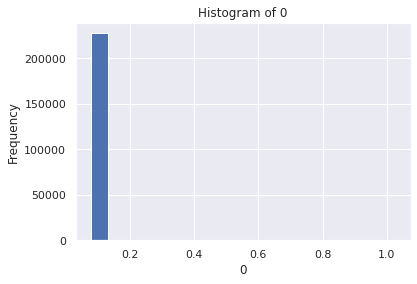

In [ ]:
anomalyScoresPCA_h2o.hist()

In [ ]:
anomalyScoresPCA_h2o.quantile()

Probs,0Quantiles
0.01,6.44003e-07
0.1,7.35062e-06
0.25,2.05486e-05
0.333,3.15163e-05
0.5,6.3834e-05
0.667,0.000124889
0.75,0.000180762
0.9,0.000463321
0.99,0.00164339


In [ ]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [ ]:
anomalyScoresPCA_h2o.quantile(prob=[0.998271]) # ti le fraud

Probs,0Quantiles
0.998271,0.0213515


Predict in train set

In [ ]:
#Best Threshold=0.027314, F-Score=0.799
best_threshold=0.0213515 # Normal threshold if not tunning
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

accuracy_score: 
 0.9992538787333495
confusion_matrix 
 [[227366     85]
 [    85    309]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.78      0.78      0.78       394

    accuracy                           1.00    227845
   macro avg       0.89      0.89      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
best_threshold=0.5 # Normal threshold if not tunning
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

accuracy_score: 
 0.9985209243125809
confusion_matrix 
 [[227435     16]
 [   321     73]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.19      0.30       394

    accuracy                           1.00    227845
   macro avg       0.91      0.59      0.65    227845
weighted avg       1.00      1.00      1.00    227845



Predict in test set

In [ ]:
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse,index=X_test.index)
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)

best_threshold=0.0213515 # Normal threshold if not tunning
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9992626663389628
confusion_matrix 
 [[56842    22]
 [   20    78]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.80      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## SparsePCA

In [ ]:
# SparsePCA
from sklearn.decomposition import SparsePCA

n_components = 27
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=X_train.index)
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA). \
    dot(sparsePCA.components_) + np.array(X_train.mean(axis=0))
X_train_sparsePCA_inverse = pd.DataFrame(data=X_train_sparsePCA_inverse,index=X_train.index)

anomalyScoresPCA = anomalyScores(X_train, X_train_sparsePCA_inverse)

In [ ]:
anomalyScoresPCA_h2o = h2o.H2OFrame(pd.DataFrame(anomalyScoresPCA))
anomalyScoresPCA_h2o.quantile(prob=[0.998271]) # ti le fraud

Parse progress: |█████████████████████████████████████████████████████████| 100%


Probs,0Quantiles
0.998271,0.0214191


In [ ]:
best_threshold=0.0214191
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

accuracy_score: 
 0.9992451008360947
confusion_matrix 
 [[227365     86]
 [    86    308]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.78      0.78      0.78       394

    accuracy                           1.00    227845
   macro avg       0.89      0.89      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
X_test_PCA = sparsePCA.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse =  np.array(X_test_PCA). \
    dot(sparsePCA.components_) + np.array(X_test.mean(axis=0))
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse,index=X_test.index)
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)

best_threshold=0.0214191
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScoresPCA]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9992626663389628
confusion_matrix 
 [[56842    22]
 [   20    78]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.80      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



# Auto encoder DL

In [ ]:

'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algos'''
#import lightgbm as lgb

'''TensorFlow and Keras'''
import tensorflow as tf
from tensorflow import keras
K = keras.backend

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

In [ ]:
import sys, sklearn
print(f'sklearn    {sklearn.__version__}')
print(f'tensorflow {tf.__version__}')
print(f'keras      {keras.__version__}')
print(f'numpy      {np.__version__}')

sklearn    0.22.2.post1
tensorflow 2.4.1
keras      2.4.0
numpy      1.19.5


In [ ]:
# To make the output stable across runs
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class','Time'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20, \
                    random_state=2018, stratify=dataY)

In [ ]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - 
                   np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

Model Three

Three layer undercomplete autoencoder with linear activation.
With 28 and 27 nodes in the two hidden layers, respectively

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)
test_scores = []

# Call neural network API
model = Sequential()

# Apply linear activation function to input layer
# Generate first hidden layer with 27 nodes
# Generate second hidden layer with 28 nodes
model.add(Dense(units=28, activation='linear',input_dim=29))
model.add(Dense(units=27, activation='linear'))

# Apply linear activation function to second hidden layer
# Generate output layer with 29 nodes
model.add(Dense(units=29, activation='linear'))

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train, y=y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train, y_train),
                    verbose=1)




Epoch 1/10
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0423 - accuracy: 0.0502 - val_loss: 0.0018 - val_accuracy: 0.0037
Epoch 2/10
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0011 - accuracy: 0.0227 - val_loss: 8.8404e-04 - val_accuracy: 0.0096
Epoch 3/10
7121/7121 [==============================] - 15s 2ms/step - loss: 9.1330e-04 - accuracy: 0.0219 - val_loss: 0.0012 - val_accuracy: 0.0175
Epoch 4/10
7121/7121 [==============================] - 15s 2ms/step - loss: 8.9984e-04 - accuracy: 0.0178 - val_loss: 8.6748e-04 - val_accuracy: 0.0704
Epoch 5/10
7121/7121 [==============================] - 14s 2ms/step - loss: 9.7712e-04 - accuracy: 0.0307 - val_loss: 8.4466e-04 - val_accuracy: 0.0047
Epoch 6/10
7121/7121 [==============================] - 14s 2ms/step - loss: 9.7450e-04 - accuracy: 0.0351 - val_loss: 8.6196e-04 - val_accuracy: 0.0013
Epoch 7/10
7121/7121 [==============================] - 15s 2ms/step - loss: 9.7899e-04 - accuracy

In [ ]:
!pip install h2o

     |████████████████████████████████| 164.6MB 48kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=fb9b99795d860c4a0432b17e2d9c95c1ef42eb4e97c0d464a223b4a99370f923
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd5ptwz9s
  JVM stdout: /tmp/tmpd5ptwz9s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd5ptwz9s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_2kxmgc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
# Evaluate on train set
predictions = model.predict(X_train, verbose=1) # prediction is nearly the same as X_train
predictions = pd.DataFrame(data=predictions,index=X_train.index)
predictions.head()

7121/7121 [==============================] - 7s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
212834,0.000892,-0.000771,-0.000132,-0.000731,0.000409,0.000350,0.001214,-0.001293,-0.000168,-0.000470,-0.000780,0.000485,0.001509,0.000147,0.001013,0.001370,-0.000879,0.000517,0.002528,0.000232,0.001192,0.000574,0.000637,0.000198,0.000861,0.002962,0.001041,-0.000003,-0.001984
175643,0.000345,-0.000047,0.000655,0.000213,-0.000186,0.000172,0.000160,0.000189,-0.000004,-0.000158,0.000738,-0.000446,0.000100,0.000398,0.000079,-0.000196,-0.000296,-0.000141,0.000285,-0.000308,0.000815,0.000579,0.000243,0.000091,-0.000433,-0.000347,-0.000413,0.000027,-0.000459
32164,0.003402,0.002823,0.002259,0.002218,0.002788,0.002384,0.002400,0.001947,0.002298,0.002736,0.002181,0.002197,0.003172,0.002505,0.002462,0.002865,0.002564,0.003177,0.003627,0.002733,0.003624,0.002510,0.003502,0.003308,0.003183,0.004588,0.003929,0.002555,0.001302
79783,0.000690,-0.000109,0.000094,0.000066,0.000843,0.000521,0.001290,-0.000176,-0.000185,-0.000469,-0.000224,-0.000592,0.001265,0.000873,0.000553,0.000979,-0.000490,-0.000002,0.001635,0.000229,0.001166,0.000915,0.000512,0.000899,0.000112,0.001772,0.000815,0.000228,-0.001483
107026,0.002067,0.000457,0.001548,0.001501,0.001307,0.002437,0.002059,0.001437,0.001543,0.001447,0.001730,0.002184,0.002102,0.001810,0.002378,0.002072,0.000882,0.002552,0.002423,0.001581,0.001981,0.002110,0.001965,0.001405,0.002318,0.002944,0.001714,0.001335,0.001117


In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212834,-0.193563,-0.136547,-0.044610,-1.471851,0.299420,-0.447038,0.065017,-0.903609,-0.798323,0.777325,0.567004,-1.292424,-1.835557,0.267809,-0.676375,1.297130,-0.277600,-0.458910,0.618104,-0.431244,1.781078,1.908755,-0.224010,1.282179,-1.551742,-0.388800,0.018078,0.019746,-0.189908
175643,1.145707,-0.464983,-1.365275,-0.886248,0.305657,0.066829,-0.273461,-0.153975,-0.720206,0.881148,0.098351,0.322958,1.307987,-0.171925,-1.092521,1.037590,-0.323926,-0.816001,1.463272,0.145879,0.755524,2.356802,-0.473290,-0.455927,1.229323,0.632015,-0.113455,-0.257673,-0.253277
32164,-0.132705,0.713528,0.633126,0.630864,0.100135,0.231616,0.130995,-1.418178,-0.417453,0.428285,1.664365,1.082977,0.337247,0.279745,0.476292,-0.411223,-0.270911,-0.000925,0.079491,-0.446114,2.304290,0.332887,0.582661,0.332978,-2.285405,-1.196946,0.395602,-0.122872,-0.273268
79783,0.677347,-0.593270,0.134047,-0.819728,-0.374058,0.793413,-0.989350,0.295608,-0.421328,0.672262,-0.039082,-0.728508,-0.042104,-0.215013,0.938789,2.189987,-0.602120,-0.197767,0.977359,0.230517,0.499247,1.235857,-0.528168,-2.753810,0.998054,0.138978,0.089492,0.003362,-0.133535
107026,-0.161335,0.702321,0.761409,-0.019016,0.180568,-0.574303,0.599706,-0.067450,-0.410422,-0.483954,-0.433314,0.084132,0.714155,-0.580312,0.941704,0.527760,-0.179441,-0.103065,0.049886,0.207703,-0.382678,-0.981056,-0.103749,-0.019104,-0.181466,0.191556,0.615710,0.290262,-0.338876


In [ ]:
originalDF = X_train
reducedDF = predictions
loss = np.sum((np.array(originalDF) - 
                np.array(reducedDF))**2, axis=1)
loss = pd.Series(data=loss,index=originalDF.index)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
loss

212834    0.000419
175643    0.000360
32164     0.000360
79783     0.000381
107026    0.000044
            ...   
48687     0.000331
159608    0.000166
205176    0.001988
197673    0.000749
151952    0.000664
Length: 227845, dtype: float64

In [ ]:
#anomalyScores = anomalyScores(X_train, predictions)
anomalyScores = loss
anomalyScores_h2o = h2o.H2OFrame(pd.DataFrame(anomalyScores))
anomalyScores_h2o.quantile() # ti le fraud
anomalyScores_h2o.quantile(prob=[0.998271]) # ti le fraud

Parse progress: |█████████████████████████████████████████████████████████| 100%


Probs,0Quantiles
0.01,4.2841e-05
0.1,9.31087e-05
0.25,0.000156913
0.333,0.000194149
0.5,0.000278055
0.667,0.000390163
0.75,0.000461186
0.9,0.000741543
0.99,0.00476261


In [ ]:
anomalyScores_h2o.quantile(prob=[0.998271]) # ti le fraud

Probs,0Quantiles
0.998271,0.0183468


In [ ]:
best_threshold=0.0183468
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScores]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

accuracy_score: 
 0.997340297131822
confusion_matrix 
 [[227148    303]
 [   303     91]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.23      0.23      0.23       394

    accuracy                           1.00    227845
   macro avg       0.61      0.61      0.61    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
y_train

212834    0
175643    0
32164     0
79783     0
107026    0
         ..
48687     0
159608    0
205176    0
197673    0
151952    0
Name: Class, Length: 227845, dtype: int64

In [ ]:
len(y_pred_new) # list

227845

In [ ]:
# Evaluate on test set
predictions = model.predict(X_test, verbose=1) # prediction is nearly the same as X_train
predictions = pd.DataFrame(data=predictions,index=X_test.index)

originalDF = X_test
reducedDF = predictions
loss = np.sum((np.array(originalDF) - 
                np.array(reducedDF))**2, axis=1)
loss = pd.Series(data=loss,index=originalDF.index)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
anomalyScores=loss
best_threshold=0.0183468
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScores]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

1781/1781 [==============================] - 2s 990us/step
accuracy_score: 
 0.9911695516309118
confusion_matrix 
 [[56399   465]
 [   38    60]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.11      0.61      0.19        98

    accuracy                           0.99     56962
   macro avg       0.56      0.80      0.59     56962
weighted avg       1.00      0.99      0.99     56962



Model eight

Two layer sparse overcomplete autoencoder with linear activation and dropout
29 -> 40 -> 29
Dropout percentage: 5%

In [ ]:
model = Sequential()

model.add(Dense(units=40, activation='linear',  \
    activity_regularizer=regularizers.l1(10e-5), input_dim=29))
model.add(Dropout(0.05))

# Generate output layer with 29 nodes
model.add(Dense(units=29, activation='linear'))

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
batch_size = 32

history = model.fit(x=X_train, y=X_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train, X_train),
                    verbose=1)

Epoch 1/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.2198 - accuracy: 0.7181 - val_loss: 0.0049 - val_accuracy: 0.9806
Epoch 2/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0404 - accuracy: 0.8610 - val_loss: 0.0047 - val_accuracy: 0.9822
Epoch 3/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0411 - accuracy: 0.8613 - val_loss: 0.0074 - val_accuracy: 0.9724
Epoch 4/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0415 - accuracy: 0.8601 - val_loss: 0.0050 - val_accuracy: 0.9789
Epoch 5/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0413 - accuracy: 0.8602 - val_loss: 0.0047 - val_accuracy: 0.9839
Epoch 6/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0409 - accuracy: 0.8622 - val_loss: 0.0049 - val_accuracy: 0.9769
Epoch 7/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0397 - accuracy: 0.8611 - val_loss: 0.0044 - val_ac

In [ ]:
# Evaluate on train set
predictions = model.predict(X_train, verbose=1) # prediction is nearly the same as X_train
predictions = pd.DataFrame(data=predictions,index=X_train.index)

originalDF = X_train
reducedDF = predictions
loss = np.sum((np.array(originalDF) - 
                np.array(reducedDF))**2, axis=1)
loss = pd.Series(data=loss,index=originalDF.index)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
anomalyScores = loss
anomalyScores_h2o = h2o.H2OFrame(pd.DataFrame(anomalyScores))
anomalyScores_h2o.quantile() # ti le fraud
anomalyScores_h2o.quantile(prob=[0.998271]) # ti le fraud

7121/7121 [==============================] - 7s 958us/step
Parse progress: |█████████████████████████████████████████████████████████| 100%


Probs,0Quantiles
0.998271,0.0556092


In [ ]:
best_threshold=0.0556092
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScores]
confmat = confusion_matrix(y_train,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_train, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_train, y_pred_new))

accuracy_score: 
 0.9986920933090478
confusion_matrix 
 [[227302    149]
 [   149    245]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.62      0.62      0.62       394

    accuracy                           1.00    227845
   macro avg       0.81      0.81      0.81    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Evaluate on test set
predictions = model.predict(X_test, verbose=1) # prediction is nearly the same as X_train
predictions = pd.DataFrame(data=predictions,index=X_test.index)

originalDF = X_test
reducedDF = predictions
loss = np.sum((np.array(originalDF) - 
                np.array(reducedDF))**2, axis=1)
loss = pd.Series(data=loss,index=originalDF.index)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
anomalyScores=loss
best_threshold=0.0183468
y_pred_new = [1 if x >= best_threshold else 0 for x in anomalyScores]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

1781/1781 [==============================] - 2s 925us/step
accuracy_score: 
 0.9974368877497279
confusion_matrix 
 [[56738   126]
 [   20    78]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.80      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962



# ML method

In [ ]:
import time

In [ ]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20, \
                    random_state=2018, stratify=dataY)

In [ ]:
start=time.time()
xgb=XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                #scale_pos_weight=1,
                seed=2018,
                verbosity=1    
                              )
xgb.fit(X_train, y_train)
end=time.time() 
print("time: ",end-start)

y_pred=xgb.predict(X_test)
y_pred_probs=xgb.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

time:  48.214619398117065
average_precision 0.8600324926641665
AUC 0.9786933449519368
f1 score 0.8972972972972973
balanced_accuracy_score: 0.9234342161175106
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
start=time.time()
lgbm=LGBMClassifier(
    n_estimators = 200,
    boosting_type = 'gbdt',
    objective = 'binary',
    metric= 'binary:logloss',
    metric_freq=50,
    learning_rate=0.01,
    max_depth=4,
    num_leaves= 16, #(2^maxdepth)
    #min_data_in_leaf=2000,
    scale_pos_weight=1,
    num_threads=16,
    random_state =500,
    bagging_freq=0,
                                )
lgbm.fit(X_train, y_train)
end=time.time() 
print("time: ",end-start)

y_pred=lgbm.predict(X_test)
y_pred_probs=lgbm.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print("f1 score",f1_score(y_test,y_pred))
print("balanced_accuracy_score:",balanced_accuracy_score(y_test,y_pred))
print('classification_report \n',classification_report(y_test, y_pred))

time:  8.180473566055298
average_precision 0.8315971400187149
AUC 0.9737933616046306
f1 score 0.8491620111731844
balanced_accuracy_score: 0.887711137493827
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

